# 1 第一章：探索性数据分析
开始之前，导入numpy、pandas包和数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
#载入之前保存的train_chinese.csv数据，关于泰坦尼克号的任务，我们就使用这个数据
df = pd.read_csv('train_chinese.csv')
df.head()

,Unnamed: 0,乘客ID,是否幸存,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.6 你了解你的数据吗？
教材《Python for Data Analysis》第五章

### 1.6.1 任务一：利用Pandas对示例数据进行排序，要求升序

In [3]:
df = pd.DataFrame(np.arange(16).reshape((4,4)),
                  index=['two','one','three','four'],
                  columns=['d','a','c','b'])
df.sort_index()#按key值默认升序（这里是key的字典序）

,d,a,c,b
four,12,13,14,15
one,4,5,6,7
three,8,9,10,11
two,0,1,2,3


In [4]:
df.sort_index(axis=1,ascending=False) 
#按照横轴（列名）排序（降序）

,d,c,b,a
two,0,2,3,1
one,4,6,7,5
three,8,10,11,9
four,12,14,15,13


In [7]:
#对选定行进行排序(貌似会打乱其他行，这里没弄清楚，
#回头查阅资料理明白了再补清楚）
df = pd.DataFrame({
    'b': [4,6,-1,2],
    'c': [1,5,-3,0],
    'a': [3,-2,5,6],
    'd': [3,4,-5,1],
})
df.sort_values(by='c',ascending=True)#by也可以是个列表

,b,c,a,d
2,-1,-3,5,-5
3,2,0,6,1
0,4,1,3,3
1,6,5,-2,4


### 1.6.2 任务二：对泰坦尼克号数据（trian.csv）按票价和年龄两列进行综合排序（降序排列），从数据中你能发现什么

In [11]:
df = pd.read_csv('train_chinese.csv')
df.sort_values(by=['票价','年龄'],ascending=False).head()

,Unnamed: 0,乘客ID,是否幸存,乘客等级(1/2/3等舱位),乘客姓名,性别,年龄,堂兄弟/妹个数,父母与小孩个数,船票信息,票价,客舱,登船港口
679,679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
438,438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S


中年人的资金较多，会买价格比较贵的高等舱，而老年人和年轻人则是买的普通票

### 1.6.3 任务三：利用Pandas进行算术计算，计算两个DataFrame数据相加结果

In [15]:
df_1 = pd.DataFrame(np.arange(8.).reshape(2,4),
                    columns=['a','b','c','d'],
                    index=['first','second']
)
df_2 = pd.DataFrame(np.arange(8.).reshape(2,4),
                    columns=['a','b','d','f'],
                    index=['first','three']
)

In [16]:
df_1

,a,b,c,d
first,0.0,1.0,2.0,3.0
second,4.0,5.0,6.0,7.0


In [17]:
df_2

,a,b,d,f
first,0.0,1.0,2.0,3.0
three,4.0,5.0,6.0,7.0


In [18]:
df_1 + df_2

,a,b,c,d,f
first,0.0,2.0,NaN,5.0,NaN
second,NaN,NaN,NaN,NaN,NaN
three,NaN,NaN,NaN,NaN,NaN


可以发现如果一方有缺失值，则运算值为NaN

### 1.6.4 任务四：通过泰坦尼克号数据如何计算出在船上最大的家族有多少人？

In [22]:
df = pd.read_csv('train_chinese.csv')
#df.head()
max(df['堂兄弟/妹个数'] + df['父母与小孩个数'])

10

In [ ]:
第二种，通过降序排序来选择第一个就是最大的家族的人数

In [38]:
df.sort_values(by=['堂兄弟/妹个数','父母与小孩个数'],ascending=False)
(df['堂兄弟/妹个数'] + df['父母与小孩个数']).sort_values(ascending=False).values[0]

10

### 1.6.5 任务五：学会使用Pandas describe()函数查看数据基本统计信息

In [41]:
#这里直接用书上的例子了
f = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
           [np.nan, np.nan], [0.75, -1.3]],
           index=['a', 'b', 'c', 'd'],
           columns=['one', 'two'])
f

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [46]:
f.describe()#好的这里又有bug，等我更新了pandas这些再试试
```
count : 样本数据大小
mean : 样本数据的平均值
std : 样本数据的标准差
min : 样本数据的最小值
25% : 样本数据25%的时候的值
50% : 样本数据50%的时候的值
75% : 样本数据75%的时候的值
max : 样本数据的最大值
```

SyntaxError: invalid syntax (<ipython-input-46-7f729a7cefc8>, line 2)

### 1.6.6 任务六：分别看看泰坦尼克号数据集中 票价、父母子女 这列数据的基本统计数据，你能发现什么？

In [43]:
df = pd.read_csv('train_chinese.csv')
df['票价'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: 票价, dtype: float64

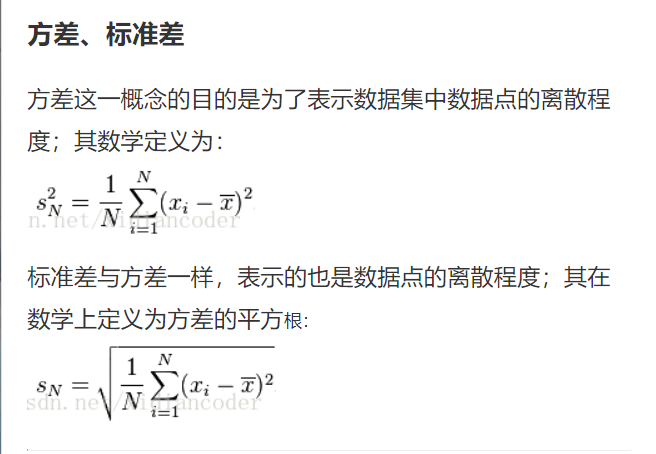
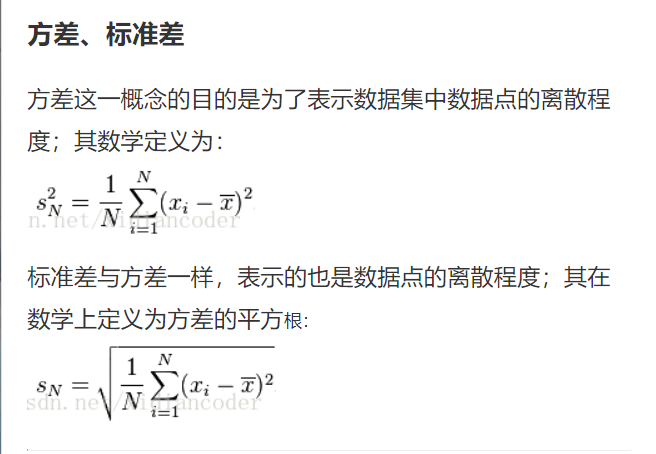

In [ ]:
可见票价波动有点大